### Transmission Line Model Geomagnetic Induction in Submarine Cable
---
* __author__ = [Chakraborty, S.; Boteler, D. B. H.]
* __copyright__ = 
* __credits__ = []
* __license__ = MIT
* __version__ = 1.0
* __maintainer__ = Chakraborty, S.
* __email__ = shibaji7@vt.edu
* __status__ = Research

>  We are going to use three different ocean/earth models for this analysis. For this analysis we are going to use following resistivity model Ocean/{Earth}: 0.3/{3,3000,1000,100,10,1} in $\Omega m$. Three cases are following:
> * 
> * 
> * 

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy.fftpack
from scipy.stats import pearsonr

import bezpy
from gic.model.oml import OceanModel
from gic.model.utils import RecursiveNamespace
from gic.model.cables import Cable

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(["science", "ieee"])
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/shibaji/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def create_transfer_functions(thickness, resistivity, flim=[1e-6,1e-2]):
    om = OceanModel(thickness, resistivity, flim=flim) # Create ocean-earth leayerd model
    Tx = om.get_TFs() # Get transfer function
    return om, Tx, flim

def plot_transfer_function(Tx):
    fig = plt.figure(dpi=180, figsize=(3,2.5))
    ax = fig.add_subplot(111)
    ax.loglog(Tx.freq, np.abs(Tx.E2B), "r", lw=0.6, ls="-")
    ax.set_xlabel(r"Frequency [Hz]")
    ax.set_ylabel(r"Amplitude [mV/km/nT]", color="r")
    ax.set_xlim(1e-6,1e-2)
    ax.set_ylim(1e-4,1e-1)
    ax = ax.twinx()
    ax.semilogx(Tx.freq, np.angle(Tx.E2B, deg=True), "b", lw=0.6, ls="-")
    ax.set_ylabel(r"Phase [degree, $^\circ$]", color="b")
    ax.set_ylim(-90, 90)
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90])
    ax.set_yticklabels([-90, -60, -30, 0, 30, 60, 90])
    _ = ax.set_xlim(1e-6,1e-2)
    return

2023-01-24 14:00:21.419 | INFO     | gic.model.oml:__init__:70 - Compile OM[] to calc O(floor) E- and B-Fields


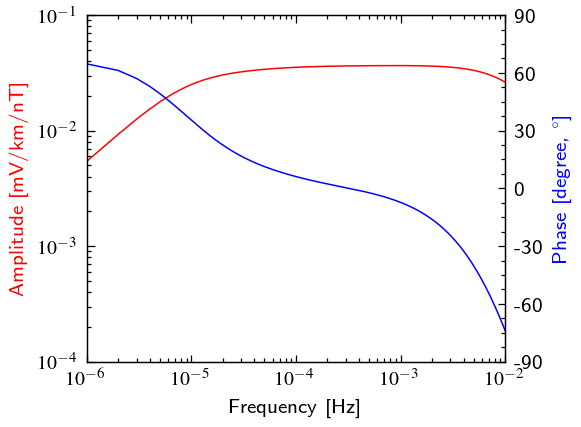

In [3]:
# Generate synthetic Ocean-Earth Model for case (i)
thickness = np.array([.1,3,20,140.,246.9,250.,340])*1e3 # Thicknesses of the Ocan [index 0] the Earth layers
resistivity = np.array([0.3,3,3000,1000,100,10,1]) # Resitivities of each layer
om, Tx, flim = create_transfer_functions(thickness, resistivity, flim=[1e-6,1e-2])
plot_transfer_function(Tx)

2023-01-24 14:05:26.816 | WARNING  | gic.model.cables:setup:427 - Into cable setup section
2023-01-24 14:05:26.818 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2023-01-24 14:05:26.818 | INFO     | gic.model.oml:__init__:70 - Compile OM[CS-T] to calc O(floor) E- and B-Fields
2023-01-24 14:05:26.821 | INFO     | gic.model.cables:compile_oml:225 - Synthetic 0fe636f6-9c1a-11ed-9c31-509a4c57ba35 CS-T->OM(CS-T)
2023-01-24 14:05:26.822 | INFO     | gic.model.cables:calc_trasmission_line_parameters:252 - Cable width: 1.0
2023-01-24 14:05:26.827 | INFO     | gic.model.cables:__init__:571 - In nodal analysis for 2 nodes
2023-01-24 14:05:26.828 | INFO     | gic.model.cables:equivalent_nodel_analysis:584 - Eq. nodal analysis.
2023-01-24 14:05:26.828 | INFO     | gic.model.cables:equivalent_nodel_analysis:587 - Node:0
2023-01-24 14:05:26.829 | INFO     | gic.model.cables:equivalent_nodel_analysis:587 - Node:1
2023-01-24 14:05:26.830 | INFO     | gic.model.ca

RecursiveNamespace(earth_model='CS-T', left_at=True, ocean_depth=100, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), right_at=True, t=array([   100,   3000,  20000, 140000, 246900, 250000, 340000]))


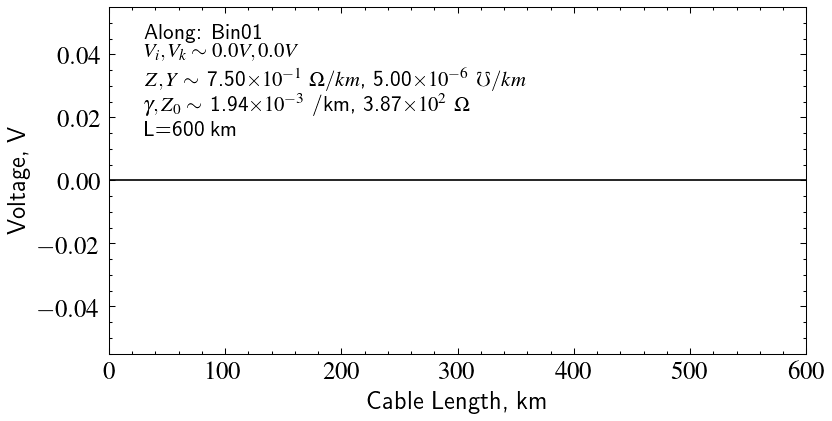

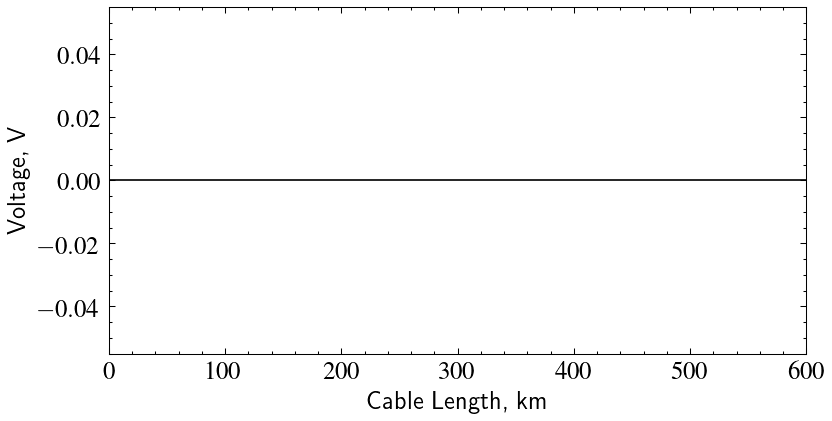

In [12]:
right_at, left_at = True, True
e = pd.DataFrame()
e["X"], e["dTime"] = [100], [0] # inputs is in mv/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 600.
            },
            "elec_params":{
                "earth_model": "CS-T",
                "ocean_depth": 100,
                "ocean_resistivity": 0.3,
                "right_at": right_at,
                "left_at": left_at,
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
tx = Cable(cable, Efields, None, ["X"], "tmp/out/006/")
tx.run_nodal_analysis()

2023-01-24 14:06:14.605 | WARNING  | gic.model.cables:setup:427 - Into cable setup section
2023-01-24 14:06:14.607 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2023-01-24 14:06:14.608 | INFO     | gic.model.oml:__init__:70 - Compile OM[CS-T] to calc O(floor) E- and B-Fields
2023-01-24 14:06:14.613 | INFO     | gic.model.cables:compile_oml:225 - Synthetic 2c625940-9c1a-11ed-9c31-509a4c57ba35 CS-T->OM(CS-T)
2023-01-24 14:06:14.613 | INFO     | gic.model.cables:calc_trasmission_line_parameters:252 - Cable width: 1.0
2023-01-24 14:06:14.619 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2023-01-24 14:06:14.620 | INFO     | gic.model.oml:__init__:70 - Compile OM[SO-T] to calc O(floor) E- and B-Fields
2023-01-24 14:06:14.625 | INFO     | gic.model.cables:compile_oml:225 - Synthetic 1 SO-T->OM(SO-T)
2023-01-24 14:06:14.625 | INFO     | gic.model.cables:calc_trasmission_line_parameters:252 - Cable width: 1.0
2023-0

RecursiveNamespace(earth_model='CS-T', left_at=True, ocean_depth=100, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), t=array([   100,   3000,  20000, 140000, 246900, 250000, 340000]))
RecursiveNamespace(earth_model='SO-T', ocean_depth=1000, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), t=array([  1000,   2000,  10000,  70000, 327000, 250000, 340000]))
RecursiveNamespace(earth_model='CS-T', ocean_depth=100, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), right_at=True, t=array([   100,   3000,  20000, 140000, 246900, 250000, 340000]))


2023-01-24 14:06:14.857 | INFO     | gic.model.cables:get_voltage_ends_of_cable_section:709 - Max(V) at the end of Section-1(Component-X), -27.53 27.53
2023-01-24 14:06:15.062 | INFO     | gic.model.cables:get_voltage_ends_of_cable_section:709 - Max(V) at the end of Section-2(Component-X), 27.53 22.68


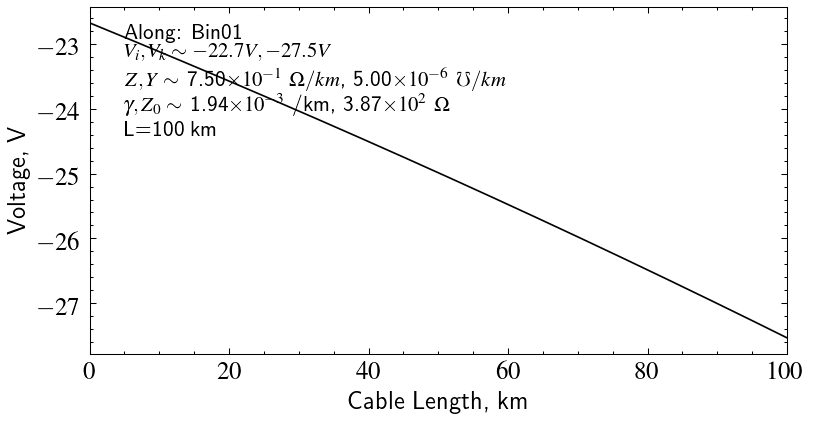

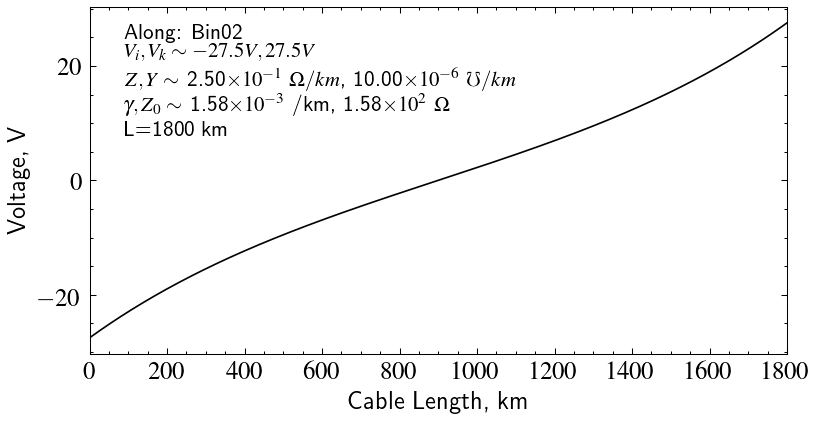

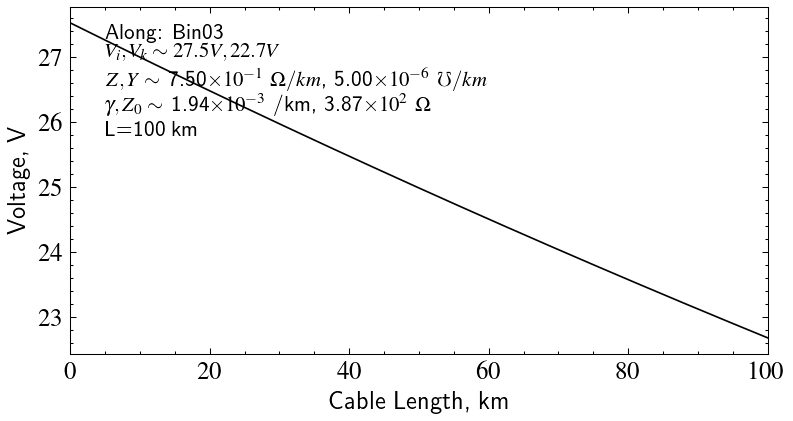

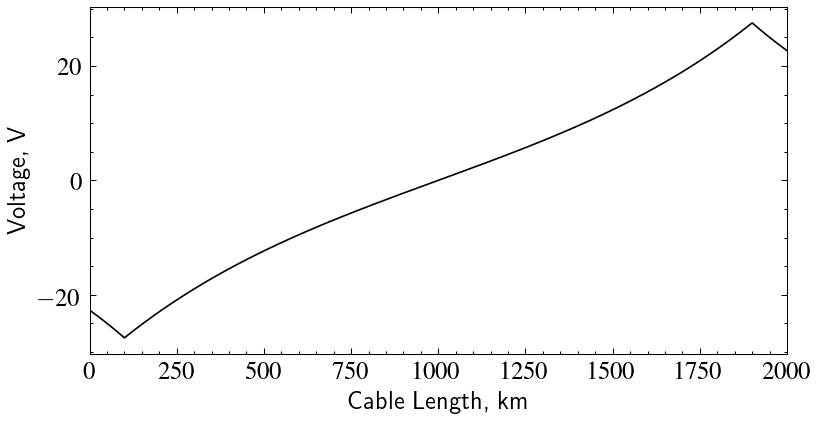

In [13]:
at = True
e = pd.DataFrame()
e["X"], e["dTime"] = [100], [0] # inputs is in mv/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 100.
            },
            "elec_params":{
                "earth_model": "CS-T",
                "ocean_depth": 100,
                "ocean_resistivity": 0.3,
                "left_at": at,
            }
        },
        {
            "sec_id": 1,
            "directed_length": {
                "ln": 1800.
            },
            "elec_params":{
                "earth_model": "SO-T",
                "ocean_depth": 1000,
                "ocean_resistivity": 0.3,
            }
        },
        {
            "sec_id": 2,
            "directed_length": {
                "ln": 100.
            },
            "elec_params":{
                "earth_model": "CS-T",
                "ocean_depth": 100,
                "ocean_resistivity": 0.3,
                "right_at": at,
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
tx = Cable(cable, Efields, None, ["X"], "tmp/out/007/")
tx.run_nodal_analysis()

2023-01-24 14:06:19.466 | WARNING  | gic.model.cables:setup:427 - Into cable setup section
2023-01-24 14:06:19.530 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2023-01-24 14:06:19.530 | INFO     | gic.model.oml:__init__:70 - Compile OM[CS-T] to calc O(floor) E- and B-Fields
2023-01-24 14:06:19.534 | INFO     | gic.model.cables:compile_oml:225 - Synthetic 2f516920-9c1a-11ed-9c31-509a4c57ba35 CS-T->OM(CS-T)
2023-01-24 14:06:19.535 | INFO     | gic.model.cables:calc_trasmission_line_parameters:252 - Cable width: 1.0
2023-01-24 14:06:19.540 | INFO     | gic.model.cables:compute_lengths:130 - Cable length from directed length
2023-01-24 14:06:19.540 | INFO     | gic.model.oml:__init__:70 - Compile OM[DO-T] to calc O(floor) E- and B-Fields
2023-01-24 14:06:19.544 | INFO     | gic.model.cables:compile_oml:225 - Synthetic 1 DO-T->OM(DO-T)
2023-01-24 14:06:19.545 | INFO     | gic.model.cables:calc_trasmission_line_parameters:252 - Cable width: 1.0
2023-0

RecursiveNamespace(earth_model='CS-T', left_at=True, ocean_depth=100, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), t=array([   100,   3000,  20000, 140000, 246900, 250000, 340000]))
RecursiveNamespace(earth_model='DO-T', ocean_depth=4000, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), t=array([  4000,   2000,  10000,  70000, 324000, 250000, 340000]))
RecursiveNamespace(earth_model='CS-T', ocean_depth=100, ocean_resistivity=0.3, r=array([3.00000000e-01, 3.00000030e+00, 3.00000003e+03, 1.00000000e+03,
       1.00000000e+02, 1.00000000e+01, 1.00000000e+00]), right_at=True, t=array([   100,   3000,  20000, 140000, 246900, 250000, 340000]))


2023-01-24 14:06:19.761 | INFO     | gic.model.cables:get_voltage_ends_of_cable_section:709 - Max(V) at the end of Section-1(Component-X), -87.68 87.68
2023-01-24 14:06:19.977 | INFO     | gic.model.cables:get_voltage_ends_of_cable_section:709 - Max(V) at the end of Section-2(Component-X), 87.68 72.24


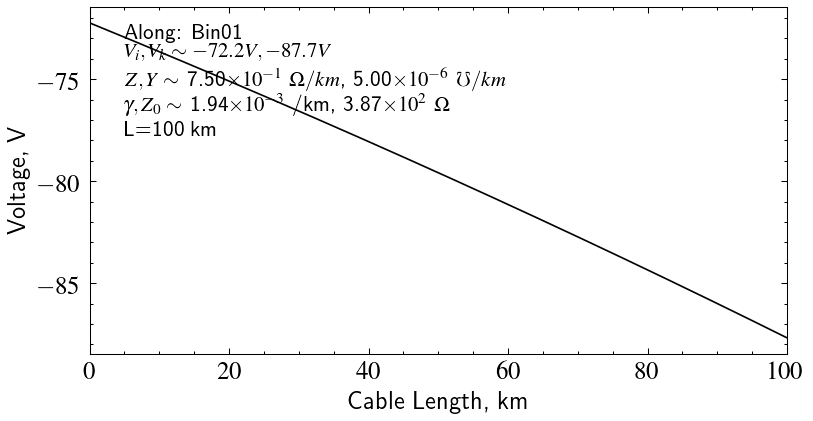

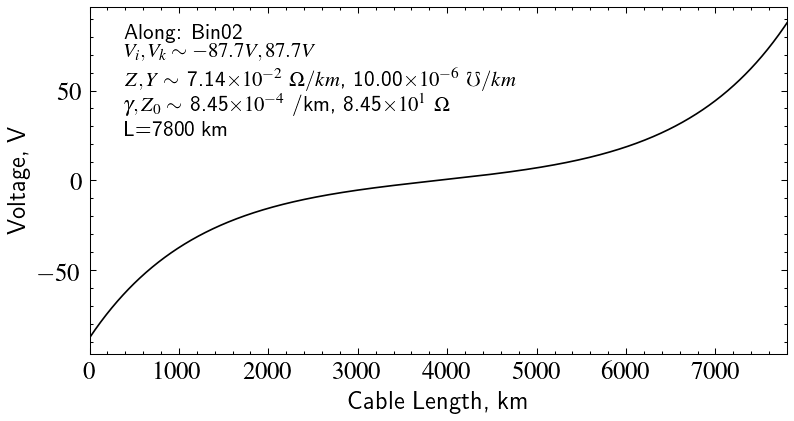

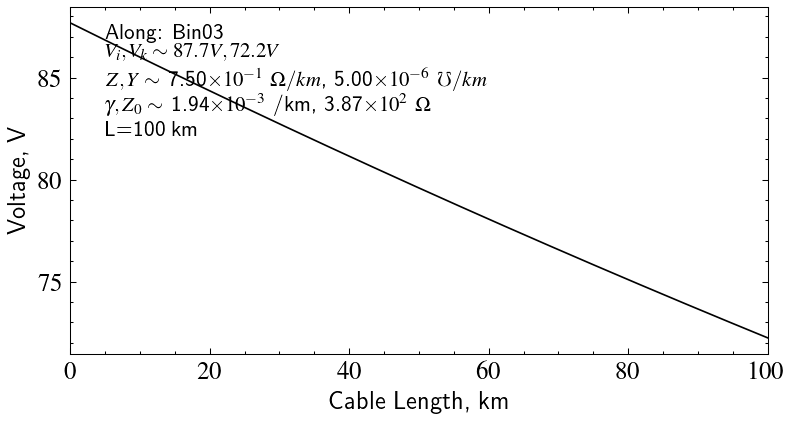

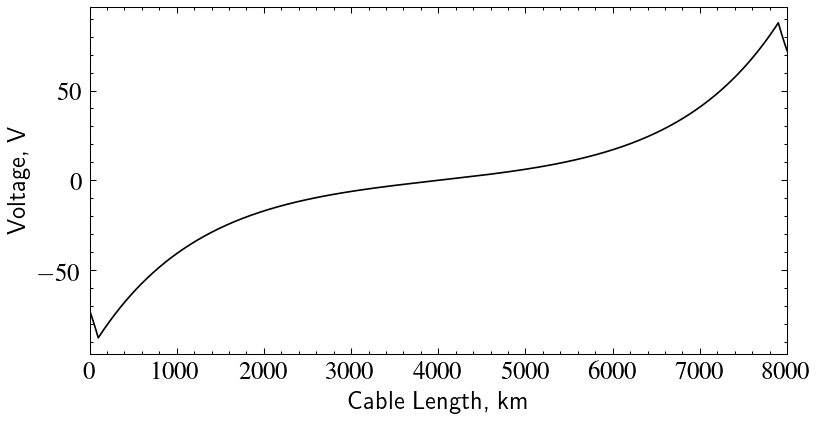

In [14]:
at = True
e = pd.DataFrame()
e["X"], e["dTime"] = [100], [0] # inputs is in mv/km
Efields = dict(
    syn = e
)
cab = {
    "cable_sections": [
        {
            "sec_id": 0,
            "directed_length": {
                "ln": 100.
            },
            "elec_params":{
                "earth_model": "CS-T",
                "ocean_depth": 100,
                "ocean_resistivity": 0.3,
                "left_at": at,
            }
        },
        {
            "sec_id": 1,
            "directed_length": {
                "ln": 7800.
            },
            "elec_params":{
                "earth_model": "DO-T",
                "ocean_depth": 4000,
                "ocean_resistivity": 0.3,
            }
        },
        {
            "sec_id": 2,
            "directed_length": {
                "ln": 100.
            },
            "elec_params":{
                "earth_model": "CS-T",
                "ocean_depth": 100,
                "ocean_resistivity": 0.3,
                "right_at": at,
            }
        }
    ],
    "cable_pot_plot_index": 0
}
cable = RecursiveNamespace(**cab)
tx = Cable(cable, Efields, None, ["X"], "tmp/out/008/")
tx.run_nodal_analysis()